# Deep Learning - Novice Level
*Rashaad Ahmad*

Pick **ONE** task and complete it.

**Tasks:**
1. Simple Neural Network ✔️
2. ~Multi-class Classification~
3. ~Model Improvement~

In [14]:
# Import libraries
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F

import matplotlib.pyplot as plt
from sklearn.datasets import make_moons


## Task 1: Simple Neural Network

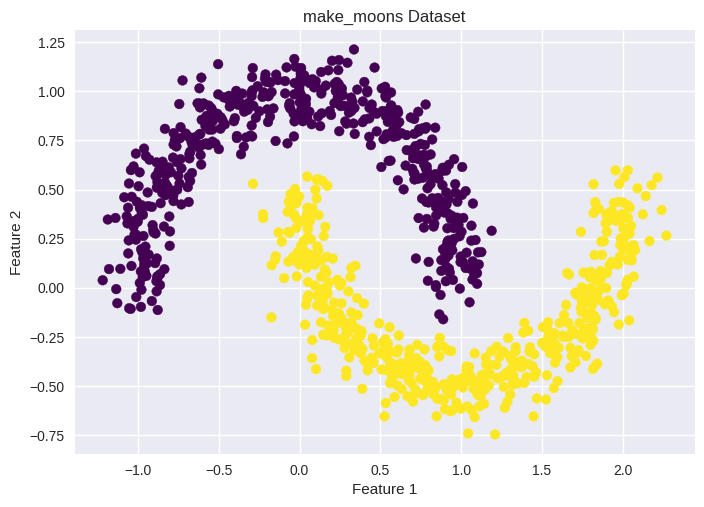

In [15]:
# Create data
x = make_moons(n_samples=1000, noise=0.1, random_state=42)
x, y = x[0], x[1]

plt.scatter(x[:, 0], x[:, 1], c=y, cmap='viridis')
plt.title("make_moons Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


In [16]:
# Build network
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1=nn.Linear(2, 10)
        self.fc2=nn.Linear(10, 10)
        self.fc3=nn.Linear(10, 2)
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()

In [17]:
# Train
epochs = 200
criterion = nn.CrossEntropyLoss()

learning_rate = 0.01
optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)

In [20]:
x = torch.tensor(x, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.long)

# Training loop
for epoch in range(epochs):
    outputs = net(x)
    loss = criterion(outputs, y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

Epoch [100/200], Loss: 0.0009
Epoch [200/200], Loss: 0.0005


/tmp/ipython-input-2095020579.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x, dtype=torch.float32)
/tmp/ipython-input-2095020579.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y, dtype=torch.long)


In [ ]:
# Visualize decision boundary
x_min, x_max = x[:, 0].min() - 0.5, x[:, 0].max() + 0.5
y_min, y_max = x[:, 1].min() - 0.5, x[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))
grid = torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32)
with torch.no_grad():
    preds = net(grid)
    predicted_classes = torch.argmax(preds, dim=1).numpy().reshape(xx.shape)



plt.style.use('seaborn-v0_8')
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, predicted_classes, alpha=0.5, cmap='coolwarm')
plt.scatter(x[:, 0], x[:, 1], c=y, edgecolors='k', cmap='coolwarm')
plt.title("Decision Boundary of Neural Network on make_moons")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.tight_layout()
plt.show()

## Task 2: Multi-class Classification

In [ ]:
# Load dataset

In [ ]:
# Build model

In [ ]:
# Train and evaluate

In [ ]:
# Show confusion matrix

## Task 3: Model Improvement

In [ ]:
# Load dataset

In [ ]:
# Try different activation functions

In [ ]:
# Try different optimizers

In [ ]:
# Compare results